<a href="https://colab.research.google.com/github/SarraBenHamad/HousePricingPrediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



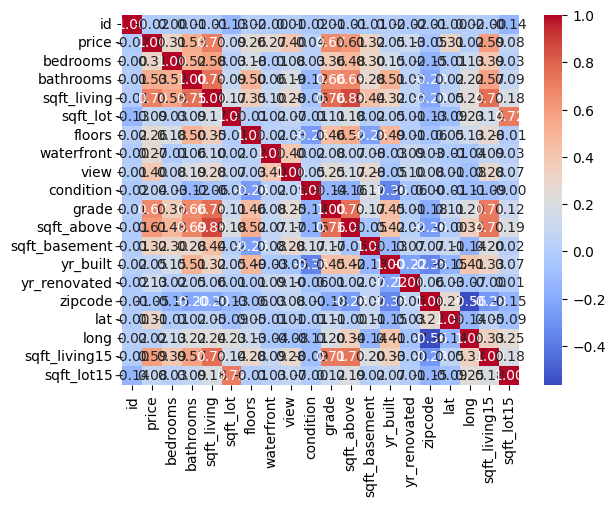

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()
df = df.drop(columns=['date'])


corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.boxplot(x=df['price'])
# plt.show()
# sns.boxplot(x=df['bedrooms'])
# plt.show()
# sns.boxplot(x=df['floors'])
# plt.show()
# sns.boxplot(x=df['sqft_living'])
# plt.show()



In [ ]:
#  # Function to remove outliers using IQR
#  def remove_outliers(df, column):
#      Q1 = df[column].quantile(0.25)
#      Q3 = df[column].quantile(0.75)
#      IQR = Q3 - Q1
#      lower_bound = Q1 - 1.5 * IQR
#      upper_bound = Q3 + 1.5 * IQR
#      return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#  # Apply to each feature and target
#  df = remove_outliers(df, 'price')
#  df = remove_outliers(df, 'bedrooms')
#  df = remove_outliers(df, 'sqft_living')
#  df = remove_outliers(df, 'floors')
#  df = remove_outliers(df, 'bathrooms')
#  df = remove_outliers(df, 'grade')



In [ ]:
df = df[['price', 'bedrooms', 'floors', 'sqft_living','bathrooms','grade']]
df.head()


,price,bedrooms,floors,sqft_living,bathrooms,grade
0,221900.0,3,1.0,1180,1.00,7
1,538000.0,3,2.0,2570,2.25,7
2,180000.0,2,1.0,770,1.00,6
3,604000.0,4,1.0,1960,3.00,7
4,510000.0,3,1.0,1680,2.00,8


In [ ]:
df.loc[:,'sqft_bedrooms'] = df['sqft_living'] * df['bedrooms']

x = df[['bedrooms', 'floors', 'sqft_living', 'bathrooms', 'grade', 'sqft_bedrooms']]

y=df[['price']]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 67859128662.0203
R-squared: 0.5511271038443782


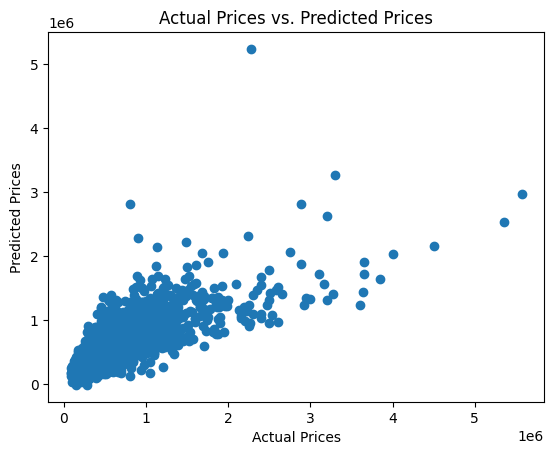

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()